In [2]:
import sqlite3
db = sqlite3.connect('./database')
cursor = db.cursor()
from scipy import stats
import numpy as np

In [10]:
WGD_len = []
SSD_len = []
sing_len = []
mix_len = []
dup_len = []

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "WGD"''')
[WGD_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "SSD"''')
[SSD_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "singleton"''')
[sing_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "WGD/SSD"''')
[mix_len.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type != "singleton"''')
[dup_len.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_len, SSD_len, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_len, sing_len, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_len, SSD_len, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_len, WGD_len, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_len, SSD_len, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_len, sing_len, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_len, sing_len, alternative='two-sided')

print('Genomic Length')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singletons:', p7.pvalue, p7.pvalue*7)

Genomic Length
WGD v SSD: 3.57780893502e-260 2.50446625451e-259
WGD v singleton: 1.52164436437e-77 1.06515105506e-76
SSD v singleton: 4.2642199549e-99 2.98495396843e-98
Mix v WGD: 2.23820572105e-05 0.000156674400474
Mix v SSD: 5.45600899394e-59 3.81920629575e-58
Mix v singleton: 2.55184458802e-09 1.78629121162e-08
Duplicates v singletons: 0.0710297991853 0.497208594297


In [11]:
WGD_ess = []
SSD_ess = []
sing_ess = []
mix_ess = []
dup_ess = []

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "WGD"''')
[WGD_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "SSD"''')
[SSD_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "singleton"''')
[sing_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "WGD/SSD"''')
[mix_ess.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type != "singleton"''')
[dup_ess.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_ess, SSD_ess, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_ess, sing_ess, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_ess, SSD_ess, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_ess, WGD_ess, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_ess, SSD_ess, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_ess, sing_ess, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_ess, sing_ess, alternative= 'two-sided')

print('Essentiality')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

Essentiality
WGD v SSD: 0.0958164937539 0.670715456277
WGD v singleton: 1.47925915881e-57 1.03548141117e-56
SSD v singleton: 2.5587091197e-62 1.79109638379e-61
Mix v WGD: 0.0874721514091 0.612305059864
Mix v SSD: 0.583441227955 4.08408859569
Mix v singleton: 8.89354459245e-27 6.22548121472e-26
Duplicates v singleton: 1.20531727311e-91 8.43722091174e-91


In [176]:
# import nbimporter
# import imp
# import Data_visualisation as v
# imp.reload(v)
# WGD_evol = []
# SSD_evol = []
# sing_evol = []


In [177]:
import math
WGD_dexp, SSD_dexp, sing_dexp, mix_dexp = [],[],[],[]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "WGD" AND exp != -1''')
[WGD_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "WGD" AND exp != -1''')
[WGD_dexp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "SSD" AND exp != -1''')
[SSD_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "SSD" AND exp != -1 AND exp != 0''')
[SSD_dexp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "singleton" AND exp != -1 AND exp != 0''')
[sing_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "singleton" AND exp != -1 AND exp != 0''')
[sing_dexp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE Dev == "No" AND dup_type == "WGD/SSD" AND exp != -1 AND exp != 0''')
[mix_dexp.append(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT dev_exp FROM gene_features WHERE Dev == "Yes" AND dup_type == "WGD/SSD" AND exp != -1 AND exp != 0''')
[mix_dexp.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_dexp, SSD_dexp, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_dexp, sing_dexp, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_dexp, SSD_dexp, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_dexp, WGD_dexp, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_dexp, SSD_dexp, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_dexp, sing_dexp, alternative= 'two-sided')

print('Dev expression')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)

Dev expression
WGD v SSD: 1.99709503199e-86 1.39796652239e-85
WGD v singleton: 1.06397809773e-13 7.44784668412e-13
SSD v singleton: 1.78638797871e-59 1.2504715851e-58
Mix v WGD: 0.398319905822 2.78823934076
Mix v SSD: 7.75401229499e-32 5.4278086065e-31
Mix v singleton: 5.99815577033e-06 4.19870903923e-05


In [17]:
WGD_exp, SSD_exp, sing_exp, mix_exp, dup_exp = [],[],[],[],[]
cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "WGD" AND exp != -1 AND exp != 0''')
[WGD_exp.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "SSD" AND exp != -1 AND exp != 0''')
[SSD_exp.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "singleton" AND exp != -1 AND exp != 0''')
[sing_exp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE dup_type == "WGD/SSD" AND exp != -1 AND exp != 0''')
[mix_exp.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT exp FROM gene_features WHERE dup_type != "singleton" AND exp != -1 AND exp != 0''')
[dup_exp.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_exp, SSD_exp, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_exp, sing_exp, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_exp, SSD_exp, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_exp, WGD_exp, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_exp, SSD_exp, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_exp, sing_exp, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_exp, sing_exp, alternative= 'two-sided')

print('Expression')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

Expression
WGD v SSD: 2.93723361645e-60 2.05606353152e-59
WGD v singleton: 1.76286202072e-06 1.2340034145e-05
SSD v singleton: 1.54149745717e-48 1.07904822002e-47
Mix v WGD: 0.0995780581538 0.697046407077
Mix v SSD: 1.01789312692e-26 7.12525188841e-26
Mix v singleton: 4.14605334917e-05 0.000290223734442
Duplicates v singleton: 8.91959295064e-07 6.24371506545e-06


In [18]:
WGD_evol, SSD_evol, sing_evol, mix_evol, dup_evol = [],[],[],[],[]

cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "WGD" AND evolRate != "-"''')
[WGD_evol.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "SSD" AND evolRate != "-"''')
[SSD_evol.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "singleton" AND evolRate != "-"''')
[sing_evol.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type == "WGD/SSD" AND evolRate != "-"''')
[mix_evol.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT evolRate FROM gene_features WHERE dup_type != "singleton" AND evolRate != "-"''')
[dup_evol.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_evol, SSD_evol, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_evol, sing_evol, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_evol, SSD_evol, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_evol, WGD_evol, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_evol, SSD_evol, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_evol, sing_evol, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_evol, sing_evol, alternative='two-sided')

print('Evolution Rate')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singletons:', p7.pvalue, p7.pvalue*7)

Evolution Rate
WGD v SSD: 7.53039907717e-112 5.27127935402e-111
WGD v singleton: 4.69144768829e-14 3.2840133818e-13
SSD v singleton: 2.99679690775e-63 2.09775783542e-62
Mix v WGD: 0.594065586014 4.1584591021
Mix v SSD: 1.52918405052e-44 1.07042883536e-43
Mix v singleton: 1.89359234872e-06 1.3255146441e-05
Duplicates v singletons: 6.55651724244e-05 0.000458956206971


In [19]:
WGD_clen, SSD_clen, sing_clen, mix_clen, dup_clen = [],[],[],[],[]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "WGD"''')
[WGD_clen.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "SSD"''')
[SSD_clen.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "singleton"''')
[sing_clen.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "WGD/SSD"''')
[mix_clen.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type != "singleton"''')
[dup_clen.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_clen, SSD_clen, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_clen, sing_clen, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_clen, SSD_clen, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_clen, WGD_clen, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_clen, SSD_clen, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_clen, sing_clen, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_clen, sing_clen, alternative= 'two-sided')

print('CDS by length')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

CDS by length
WGD v SSD: 1.19262457021e-169 8.34837199148e-169
WGD v singleton: 1.57148251941e-111 1.10003776359e-110
SSD v singleton: 1.64913365063e-08 1.15439355544e-07
Mix v WGD: 0.03994153075 0.27959071525
Mix v SSD: 4.00861326636e-47 2.80602928645e-46
Mix v singleton: 3.37728203987e-27 2.36409742791e-26
Duplicates v singleton: 5.66547743178e-25 3.96583420225e-24


In [21]:
WGD_clen2, SSD_clen2, sing_clen2, mix_clen2, dup_clen2 = [],[],[],[],[]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "WGD" AND cds_exp != -1''')
[WGD_clen2.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "SSD" AND cds_exp != -1''')
[SSD_clen2.append(x[0]) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "singleton" AND cds_exp != -1''')
[sing_clen2.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type == "WGD/SSD" AND cds_exp != -1''')
[mix_clen2.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE dup_type != "singleton" AND cds_exp != -1''')
[dup_clen2.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_clen2, SSD_clen2, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_clen2, sing_clen2, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_clen2, SSD_clen2, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_clen2,  WGD_clen2, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_clen2, SSD_clen2, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_clen2, sing_clen2, alternative= 'two-sided')
p7 = stats.mannwhitneyu(dup_clen2, sing_clen2, alternative= 'two-sided')

print('CDS by expression')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)
print('Duplicates v singleton:', p7.pvalue, p7.pvalue*7)

CDS by expression
WGD v SSD: 3.77608844743e-121 2.6432619132e-120
WGD v singleton: 5.43126284962e-97 3.80188399473e-96
SSD v singleton: 0.007994902039 0.055964314273
Mix v WGD: 0.239844894281 1.67891425997
Mix v SSD: 6.28935191026e-37 4.40254633718e-36
Mix v singleton: 9.9392947586e-27 6.95750633102e-26
Duplicates v singleton: 6.51789237826e-31 4.56252466478e-30


In [182]:
cursor.execute('''ALTER TABLE gene_features ADD COLUMN cds_ratio REAL''')

OperationalError: duplicate column name: cds_ratio

In [ ]:
cursor.execute('''SELECT id, gLength, cds_exp FROM gene_features WHERE cds_exp != -1''')
for x in cursor.fetchall():
    ratio = int(x[2])/(x[1])
    cursor.execute('''UPDATE gene_features SET cds_ratio = ? WHERE id = ?''', (ratio, x[0]))
db.commit()

In [ ]:
rDictList = sorted(rDict, key=rDict.get) #gives a list of keys sorted by value
w_low = 0
s_low = 0
sing_low = 0
for x in rDictList[:824]:
    cursor.execute('''SELECT dup_type FROM gene_features WHERE id = ?''', (x,))
    d = cursor.fetchall()[0][0]
    if d == 'WGD':
        w_low += 1
    elif d == 'SSD':
        s_low += 1
    elif d == 'singleton':
        sing_low += 1
        
print(w_low, s_low, sing_low)
# lower = rList[:824]
# upper = rList[]

In [ ]:
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "Yes" AND dup_type = "WGD"''')
print(cursor.fetchall()[0][0])
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "No" AND dup_type = "WGD"''')
print(cursor.fetchall()[0][0])
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "Yes" AND dup_type = "SSD"''')
print(cursor.fetchall()[0][0])
cursor.execute('''SELECT COUNT (*) FROM gene_features WHERE Dev = "No" AND dup_type = "SSD"''')
print(cursor.fetchall()[0][0])

In [ ]:
chi_list = [[2667,2080],
           [2790,2142]]
result = stats.chi2_contingency(chi_list)
print("P-value:",result[1])
print('Expected table:', result[3])

In [6]:
WGD_clen_con, SSD_clen_con, sing_clen_con, mix_clen_con = [],[],[],[]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "WGD"
                AND exp != -1''')
[WGD_clen_con.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "SSD"
                AND exp != -1''')
[SSD_clen_con.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "singleton"
                AND exp != -1''')
[sing_clen_con.append(x[0]) for x in cursor.fetchall()]

cursor.execute('''SELECT cds_exp FROM gene_features WHERE 
                gLength >= 10000 
                AND gLength <= 30000 
                AND dup_type = "WGD/SSD"
                AND exp != -1''')
[mix_clen_con.append(x[0]) for x in cursor.fetchall()]

p1 = stats.mannwhitneyu(WGD_clen_con, SSD_clen_con, alternative = 'two-sided')
p2 = stats.mannwhitneyu(WGD_clen_con, sing_clen_con, alternative = 'two-sided')
p3 = stats.mannwhitneyu(sing_clen_con, SSD_clen_con, alternative = 'two-sided')
p4 = stats.mannwhitneyu(mix_clen_con,  WGD_clen_con, alternative= 'two-sided')
p5 = stats.mannwhitneyu(mix_clen_con, SSD_clen_con, alternative= 'two-sided')
p6 = stats.mannwhitneyu(mix_clen_con, sing_clen_con, alternative= 'two-sided')

print('CDS by expression- controlled for Genomic Length')
print('WGD v SSD:', p1.pvalue, p1.pvalue*7)
print('WGD v singleton:', p2.pvalue, p2.pvalue*7)
print('SSD v singleton:', p3.pvalue, p3.pvalue*7)
print('Mix v WGD:', p4.pvalue, p4.pvalue*7)
print('Mix v SSD:', p5.pvalue, p5.pvalue*7)
print('Mix v singleton:', p6.pvalue, p6.pvalue*7)

CDS by expression- controlled for Genomic Length
WGD v SSD: 0.000247346854029 0.0017314279782
WGD v singleton: 2.88184319736e-17 2.01729023815e-16
SSD v singleton: 7.48680434035e-07 5.24076303825e-06
Mix v WGD: 0.0598670528316 0.419069369821
Mix v SSD: 2.89779698318e-05 0.000202845788823
Mix v singleton: 6.75753532518e-12 4.73027472762e-11


In [22]:
cursor.close()
db.close()

In [16]:
import matplotlib.pyplot as plt
test = [1:10, 20:25]
plt.hist(test)
plt.show()

SyntaxError: invalid syntax (<ipython-input-16-7dd655bb0078>, line 2)

In [ ]:
#gene expression (fix- setting as median)
count = 0
pcount = 0
import re
import numpy as np
import time

cursor.execute('CREATE TABLE IF NOT EXISTS Gene_expression_data(id TEXT, name TEXT, tissue TEXT, avg_exp REAL)')
with open('Downloads/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.txt') as expression_file:
    for i in range(2):
        expression_file.readline()
    sample_ids = expression_file.readline().strip().split('\t')[2:]
    #gets where each tissue starts and ends in the sample ids
    tissue_index = {}
    old_tissue = ''
    for i in range(0,len(sample_ids)):
        #get the tissue corresponding to each id, make a dictionary of which indexes in the line belong to each tissue
        cursor.execute('''SELECT tissue FROM sample_att WHERE GTex_id == ?''', (sample_ids[i],))
        tissue = cursor.fetchall()[0][0]
        if tissue == old_tissue:
            tissue_index[tissue].append(i)
        else:
            tissue_index[tissue] = [i]
            old_tissue = tissue
    #each line is a gene
    update_count = 0
    val_list = []
    pcount = 0
    print('starting')
    t = time.time()
    for line in expression_file:
        update_count += 1
        count += 1
        av_dict = {}
        line = line.strip().split('\t')
        #gives the gene id without the version number
        gene = re.search(r'(.*)\.(.*)', line[0]).group(1)
        exp_values = line[2:]
        for i in range(0,len(exp_values)):
             exp_values[i] = float(exp_values[i])
        for tissue in tissue_index:
            mini = min(tissue_index[tissue])
            maxi = max(tissue_index[tissue]) + 1
            #get the average expression for each tissue
            av_dict[tissue] = np.median(exp_values[mini:maxi])
            val_list.append((av_dict[tissue], gene, tissue))
        if update_count == 40:
            cursor.executemany('''UPDATE Gene_expression_data SET avg_exp = ? WHERE id == ? AND tissue == ?''', val_list)
            update_count = 0
            val_list.clear()
        if count % 500 == 0:
            print(str(count) + '%', time.time() - t)
    cursor.executemany('''UPDATE Gene_expression_data SET avg_exp = ? WHERE id == ? AND tissue == ?''', val_list)

In [66]:
cursor.execute('''SELECT gene_features.id, gene_features.gLength,gene_features.cds_len, gene_features.ess, gene_features.unique_domains, gene_features.domains,gene_features.motif_number, gene_features.gc_content, gene_features.gc3, dn_ds FROM gene_features
                INNER JOIN macaque_paralogs ON 
                gene_features.id == macaque_paralogs.id
                WHERE macaque_paralogs.dn_ds 
                AND gene_features.dup_type == "WGD"
                AND macaque_paralogs.dn_ds < 10''')
#cursor.execute('''SELECT gLength, w_exp, ess, unique_domains, motif_number, gc_content, gc3 FROM gene_features''')
values_list = cursor.fetchall()
values_list = [list(x) for x in values_list]
values_list = [x[1:] for x in values_list]

In [67]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as df
values_list = pd.DataFrame(values_list).dropna()
values_list_scale = StandardScaler().fit_transform(values_list)
pca = PCA(0.99)
pca.fit_transform(values_list_scale)
for v, c in zip(pca.explained_variance, pca.components_):
    print(v, c)

0.278437650418 [ 0.40772512  0.45666837  0.06846868  0.40713376  0.43454596  0.15353356
 -0.35741239 -0.33796865 -0.01997979]
0.221653366784 [-0.06052799  0.22642811 -0.310835    0.29886738  0.29811659  0.25948601
  0.5131673   0.50561362 -0.28971411]
0.125041457948 [ 0.4928338  -0.14246269 -0.06719243 -0.25350433 -0.35423823  0.70327344
 -0.07095982  0.03420352 -0.20434414]
0.109204264591 [-0.07534482  0.19537644 -0.66228526 -0.10863835 -0.04563252  0.17151618
  0.01811088 -0.13179504  0.67566936]
0.0930737157139 [ 0.10268044  0.00821357  0.62683251  0.02930408  0.12414158  0.25518094
  0.26039301  0.26102789  0.6157459 ]
0.0606960024148 [-0.48865264 -0.42332704  0.0244541   0.55654332 -0.05977467  0.43719145
 -0.10249192 -0.25710138  0.01895406]
0.0572133061378 [-0.54310113  0.5301      0.22648199 -0.42922093  0.03492904  0.33004283
  0.0064103  -0.21117477 -0.18364715]
0.036924571943 [-0.02240968 -0.46141954 -0.10056811 -0.41645455  0.75732848  0.12887408
 -0.1096854  -0.02323495 -0

In [16]:
def mann_whitney_effect_size(list1, list2):
    import math
    from scipy import stats
    n1 = len(list1)
    n2 = len(list2)
    N = sum([n1,n2])
    U = stats.mannwhitneyu(list1, list2, alternative = 'two-sided').statistic
    mean = U-(n1*n2)
    sd = math.sqrt((n1*n2*(n1+n2+1))/12)
    return(mean/sd)

In [18]:
l1 = [1,2,3]
l2 = [1,1,3]
mann_whitney_effect_size(l1,l2)

-1.5275252316519468

In [107]:
import pandas as pd
corr = pd.read_csv('corr.csv', index_col=0)
pv = pd.read_csv('corr_pval.csv', index_col=0)
corr
pv.style.applymap(colour_pvals)

,gLength,cds_len,unique_domains,domains,motif_number,gc3,exp,specificity,trans_count,intron_count,intron_length,avg_intron,dn_ds
gLength,nan,0,0,0,0,0,0.0459026,9.36509e-06,0,0,0,0,0
cds_len,0,nan,0,0,0,0,0.00332191,2.63048e-07,0,0,0,1.4917e-12,0
unique_domains,0,0,nan,0,0,8.65974e-15,0.122434,1.19053e-06,0,0,0,1.246e-06,0
domains,0,0,0,nan,0,0,0.185564,5.13942e-05,0,0,0,0.000607928,7.8515e-13
motif_number,0,0,0,0,nan,0,0.122783,0,0,0,0,0,0
gc3,0,0,8.65974e-15,0,0,nan,0.0282424,0,0,0,0,1.77735e-09,0
exp,0.0459026,0.00332191,0.122434,0.185564,0.122783,0.0282424,nan,2.53772e-08,0.306265,0.059206,0.0589301,0.284422,0.785258
specificity,9.36509e-06,2.63048e-07,1.19053e-06,5.13942e-05,0,0,2.53772e-08,nan,0,5.09292e-07,1.40481e-05,0.052194,4.44089e-15
trans_count,0,0,0,0,0,0,0.306265,0,nan,0,0,0.0145906,1.17684e-14
intron_count,0,0,0,0,0,0,0.059206,5.09292e-07,0,nan,0,0.00139274,0


In [108]:
corr.style.applymap(colour_corr)

,gLength,cds_len,unique_domains,domains,motif_number,gc3,exp,specificity,trans_count,intron_count,intron_length,avg_intron,dn_ds
gLength,1,0.341529,0.22652,0.191915,0.363715,-0.155711,-0.0209239,-0.0464267,0.232137,0.420189,0.990384,0.573482,-0.116232
cds_len,0.341529,1,0.449103,0.559904,0.249212,-0.119353,-0.0307723,-0.0539267,0.155752,0.742293,0.333128,0.074065,-0.118132
unique_domains,0.22652,0.449103,1,0.613122,0.172886,-0.0811871,-0.0161907,-0.050883,0.139003,0.452195,0.2252,0.0507885,-0.135053
domains,0.191915,0.559904,0.613122,1,0.0875418,-0.115275,-0.0138763,-0.0424268,0.0863514,0.475899,0.187808,0.0359232,-0.0749881
motif_number,0.363715,0.249212,0.172886,0.0875418,1,0.140432,-0.0161756,-0.130772,0.256126,0.321214,0.360845,0.176017,-0.1902
gc3,-0.155711,-0.119353,-0.0811871,-0.115275,0.140432,1,0.0229947,0.195129,-0.0983447,-0.150555,-0.155787,-0.0630103,-0.209389
exp,-0.0209239,-0.0307723,-0.0161907,-0.0138763,-0.0161756,0.0229947,1,0.0583451,-0.0107243,-0.0197751,-0.0197966,-0.0112206,0.00285622
specificity,-0.0464267,-0.0539267,-0.050883,-0.0424268,-0.130772,0.195129,0.0583451,1,-0.122109,-0.0526151,-0.0455033,-0.0203501,0.0821132
trans_count,0.232137,0.155752,0.139003,0.0863514,0.256126,-0.0983447,-0.0107243,-0.122109,1,0.42396,0.238552,0.0255983,-0.0807737
intron_count,0.420189,0.742293,0.452195,0.475899,0.321214,-0.150555,-0.0197751,-0.0526151,0.42396,1,0.422314,0.0334945,-0.153561


In [1]:
def colour_pvals(val):
    color = 'red' if float(val) < 0.05 else 'black'
    return('color: %s' % color)

In [2]:
def colour_corr(val):
    color = 'red' if float(val) >= 0.5 else 'black'
    return('color: %s' % color)

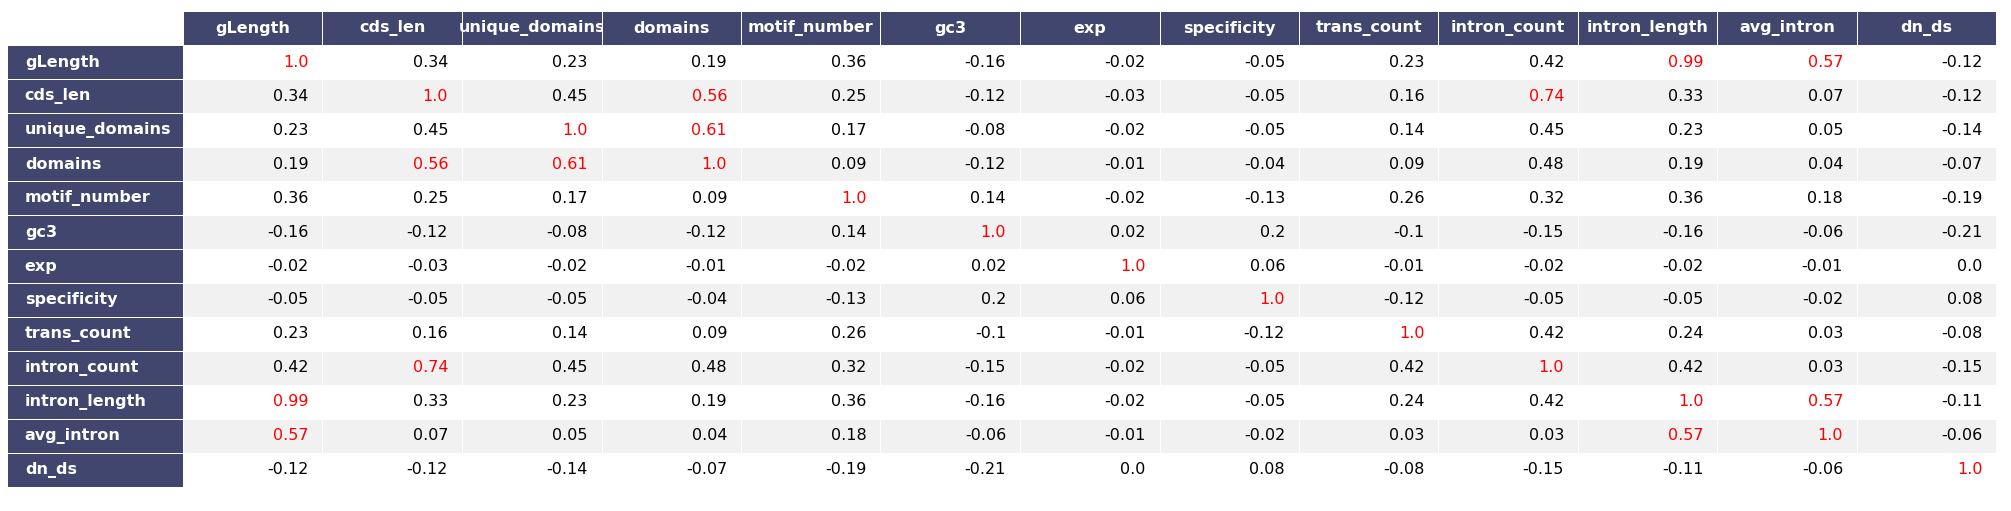

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, title, col_width=3.0, row_height=0.625, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=1,
                     ax=None, cutoff= None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, rowLabels = data.index, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    #for each cell, if the contents are greater than or equal to cutoff, set text color red
        #if not the row labels (x = 0) or column labels (y = -1)
        #.get_text on a cell returns a Text object, have to call get_text on that to actually get text
        
    for x in mpl_table.get_celld(): #gives tuples of cell coordinates, which are the keys for the .get_celld dict
        if x[0] != 0 and x[1] != -1 and float(mpl_table.get_celld()[x].get_text().get_text()) >= cutoff:
            mpl_table.get_celld()[x].set_text_props(color='r')
    
    plt.savefig(title + '.png')
    plt.show()
    
    return ax

render_mpl_table(corr.round(2), 'correlation_table', header_columns=0, col_width=2.5, cutoff=0.5)


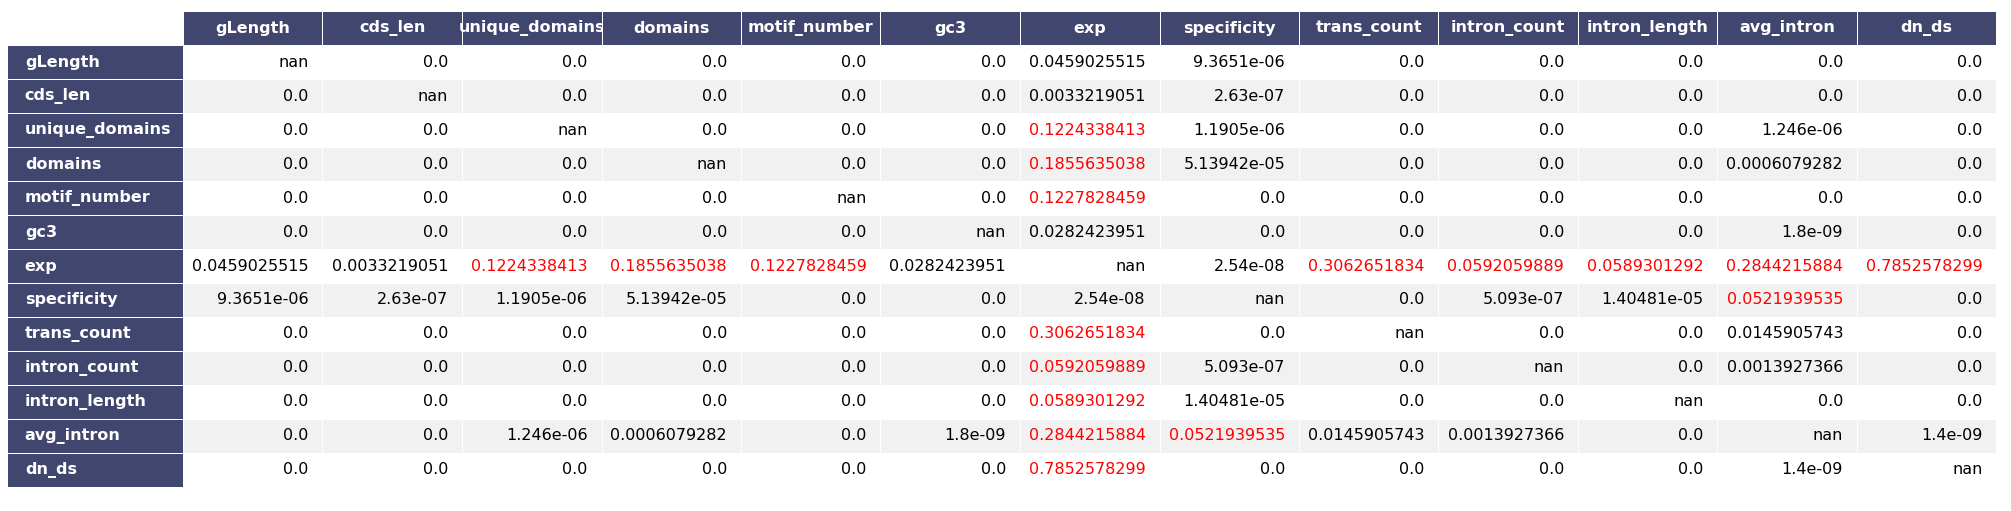

In [110]:
render_mpl_table(pv.round(10),'pval_table', header_columns=0, col_width=2.5, cutoff=0.05)

